Here we are going to analyse the different results for posterior distributions collected. 

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
postAccuracyHists = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/postAccuracyHists.csv')

In [5]:
allPosteriors = [i for i in postAccuracyHists["posterior"]]
allTrainAccs = np.array([[float(j) for j in i[1:-1].split(",")] for i in postAccuracyHists["trainAccHistory"]])
allValAccs = np.array([[float(j) for j in i[1:-1].split(",")] for i in postAccuracyHists["valAccHistory"]])

goodPosteriors = list(np.array(allPosteriors)[np.any(allValAccs[:, -5:]>0.3, axis=1)])
goodPosteriors

['default_mean_field_normal_fn',
 'mean_field_laplace_fn',
 'mean_field_studentT_fn']

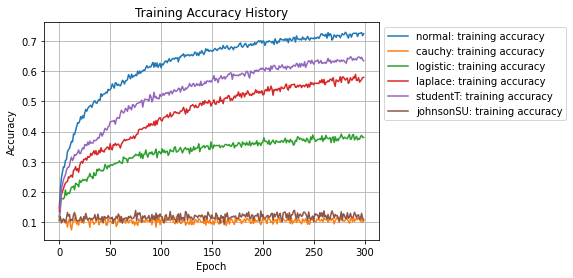

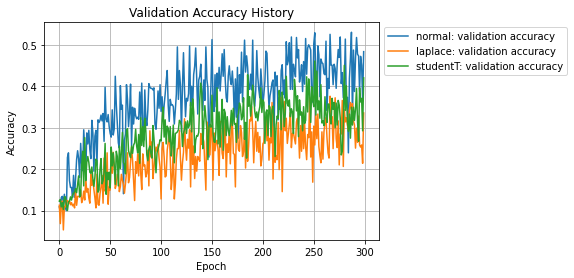

In [6]:
def graphAcc(posteriorStr):
  #This takes the posterior name as its input and graphs validation and training acc vs epoch
  if not type(posteriorStr)==list:
    trainFloatAccs = []
    for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==posteriorStr]["trainAccHistory"].iloc[0][1:-1].split(","):
      trainFloatAccs.append(float(i))

    valFloatAccs = []
    for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==posteriorStr]["valAccHistory"].iloc[0][1:-1].split(","):
      valFloatAccs.append(float(i))

    plt.plot(np.arange(300), trainFloatAccs, label=posteriorStr.split("_")[-2]+": training accuracy")
    plt.plot(np.arange(300), valFloatAccs, label=posteriorStr.split("_")[-2] + ": validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show();
  else:
    for post in posteriorStr:
      trainFloatAccs = []
      for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==post]["trainAccHistory"].iloc[0][1:-1].split(","):
        trainFloatAccs.append(float(i))

      valFloatAccs = []
      for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==post]["valAccHistory"].iloc[0][1:-1].split(","):
        valFloatAccs.append(float(i))

      plt.plot(np.arange(300), trainFloatAccs, label=post.split("_")[-2]+": training accuracy")
      plt.plot(np.arange(300), valFloatAccs, label=post.split("_")[-2] + ": validation accuracy")
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show();
    
def graphTrainAcc(posteriorStr):
  #This takes the posterior name as its input and graphs training acc vs epoch
  if not type(posteriorStr)==list:
    trainFloatAccs = []
    for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==posteriorStr]["trainAccHistory"].iloc[0][1:-1].split(","):
      trainFloatAccs.append(float(i))

    plt.plot(np.arange(300), trainFloatAccs, label=posteriorStr.split("_")[-2]+": training accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show();
  else:
    for post in posteriorStr:
      trainFloatAccs = []
      for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==post]["trainAccHistory"].iloc[0][1:-1].split(","):
        trainFloatAccs.append(float(i))

      plt.plot(np.arange(300), trainFloatAccs, label=post.split("_")[-2]+": training accuracy")    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.grid()
    plt.show();

def graphValAcc(posteriorStr):
  #This takes the posterior name as its input and graphs validation and training acc vs epoch
  if not type(posteriorStr)==list:
    valFloatAccs = []
    for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==posteriorStr]["valAccHistory"].iloc[0][1:-1].split(","):
      valFloatAccs.append(float(i))

    plt.plot(np.arange(300), valFloatAccs, label=posteriorStr.split("_")[-2] + ": validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Training Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show();
  else:
    for post in posteriorStr:
      valFloatAccs = []
      for i in postAccuracyHists.loc[postAccuracyHists["posterior"]==post]["valAccHistory"].iloc[0][1:-1].split(","):
        valFloatAccs.append(float(i))

      plt.plot(np.arange(300), valFloatAccs, label=post.split("_")[-2] + ": validation accuracy")
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title("Validation Accuracy History")
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.grid()
    plt.show();

graphTrainAcc(allPosteriors);
graphValAcc(goodPosteriors)

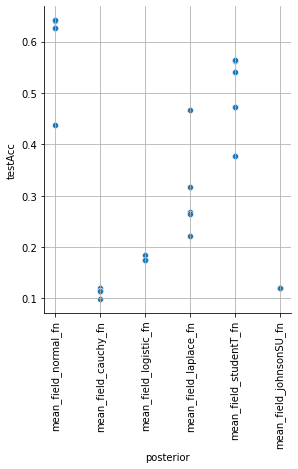

In [7]:
postTestAccs = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/postTestAccuracies.csv')
posteriorPlot = sns.relplot(data=postTestAccs, x="posterior", y="testAcc", );
posteriorPlot.set_xticklabels(rotation=90)
plt.grid()

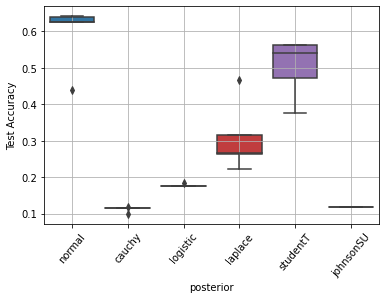

In [8]:
postTestAccs = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/postTestAccuracies.csv')
posteriorBoxPlot = sns.boxplot(data=postTestAccs.rename(columns={"posterior":"posterior", "testAcc":"Test Accuracy"}), x="posterior", y="Test Accuracy", )
posteriorBoxPlot.set_xticklabels([i.split("_")[-2] for i in postAccuracyHists["posterior"]], 
                          rotation=50);
plt.grid()

In [9]:
postTestAccs

,posterior,testAcc
0,mean_field_normal_fn,0.639188
1,mean_field_normal_fn,0.641577
2,mean_field_normal_fn,0.627240
3,mean_field_normal_fn,0.626045
4,mean_field_normal_fn,0.438471
5,mean_field_cauchy_fn,0.119474
6,mean_field_cauchy_fn,0.114695
7,mean_field_cauchy_fn,0.114695
8,mean_field_cauchy_fn,0.114695
9,mean_field_cauchy_fn,0.099164


In [10]:
dfPriorMedTestAccs = postTestAccs.groupby("posterior").median().sort_values(by=['testAcc'])
dfPriorMedTestAccs


,testAcc
posterior,
mean_field_cauchy_fn,0.114695
mean_field_johnsonSU_fn,0.119474
mean_field_logistic_fn,0.175627
mean_field_laplace_fn,0.267622
mean_field_studentT_fn,0.540024
mean_field_normal_fn,0.627240


0.5185185185185185

In [12]:
distNormal = tfd.Normal(loc = 0, scale = 1)
distCauchy = tfd.Cauchy(loc = 0, scale = 1)
distJohnsonSU = tfd.JohnsonSU(0, 1, 0, 1)
distLaplace = tfd.Laplace(loc = 0, scale = 1)
distStudentT = tfd.StudentT(df = 6, loc = 0, scale = 1)
distLogistic = tfd.Logistic(loc = 0, scale=1)

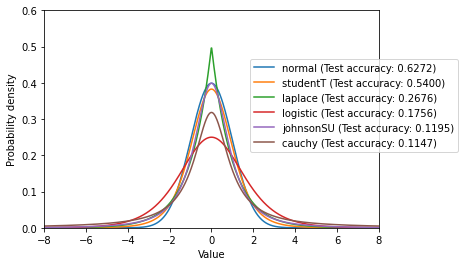

In [16]:
distList = [distNormal, distStudentT, distLaplace, distLogistic, distJohnsonSU, distCauchy]
distNames = ["normal", "studentT", "laplace", "logistic", "johnsonSU", "cauchy" ]


t = np.linspace(-8, 8, 1000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["mean_field_"+name+"_fn"][0]))

plt.axis([-8, 8, 0, 0.6])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.6, 0.3, 0.5, 0.5))
plt.show()

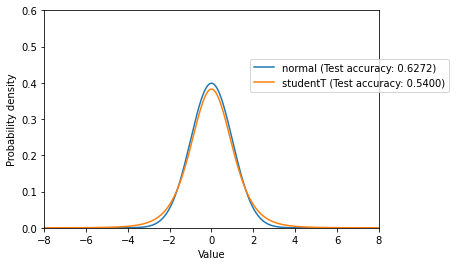

In [14]:
distList = [distNormal, distStudentT]
distNames = ["normal", "studentT"]


t = np.linspace(-8, 8, 1000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["mean_field_"+name+"_fn"][0]))

plt.axis([-8, 8, 0, 0.6])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.6, 0.3, 0.5, 0.5))
plt.show()

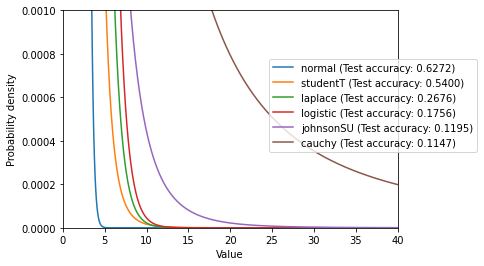

In [17]:
t = np.linspace(0, 40, 1000)
for name, dist in zip(distNames, distList):
  densities = dist.prob(t) 
  sns.lineplot(x=t, y=densities, label = name+" (Test accuracy: {:.4f})".format(dfPriorMedTestAccs.loc["mean_field_"+name+"_fn"][0]))

plt.axis([0, 40, 0, 0.001])
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend(bbox_to_anchor=(0.6, 0.3, 0.5, 0.5))
plt.show()